In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

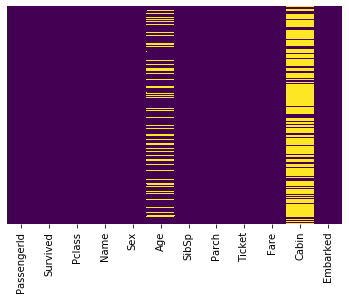

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

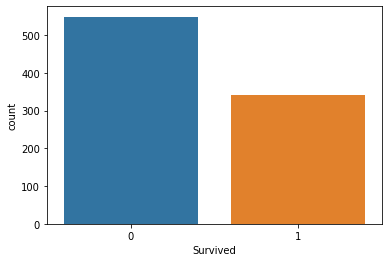

In [6]:
sns.countplot(x='Survived',data=train)

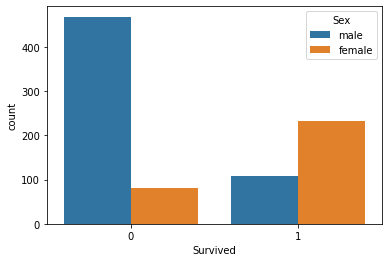

In [9]:
sns.countplot(x='Survived',data=train,hue='Sex')

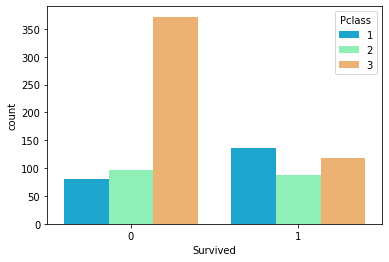

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

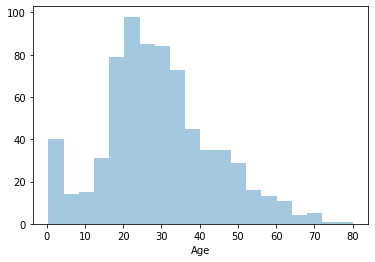

In [11]:
sns.distplot(train['Age'].dropna(),kde=False)

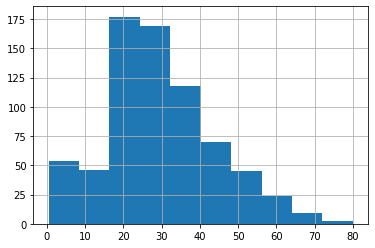

In [14]:
train['Age'].hist()

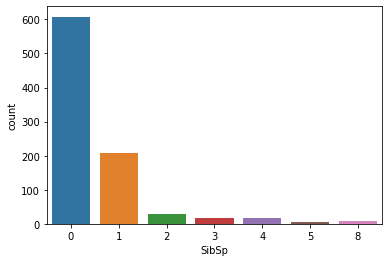

In [15]:
sns.countplot(x='SibSp',data=train)

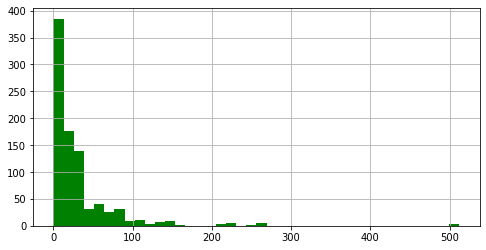

In [19]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

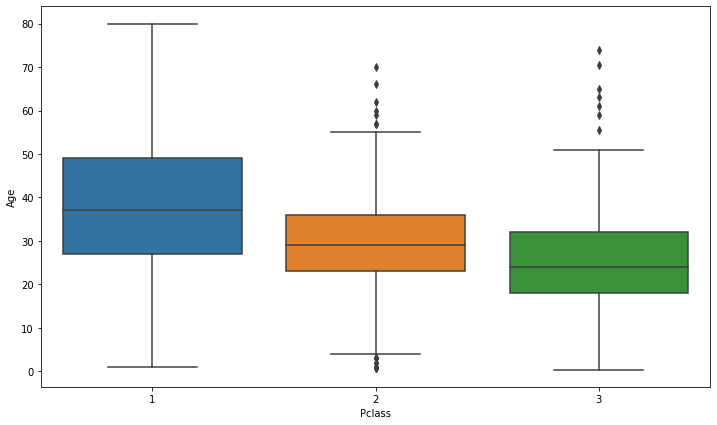

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    
    else :
        return Age

In [25]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

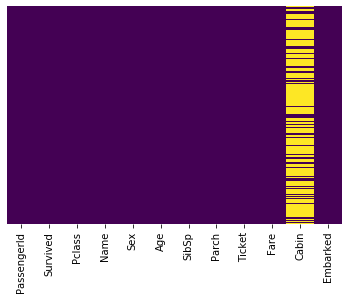

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
train.drop('Cabin',axis=1,inplace=True)

In [28]:
train.dropna(inplace=True)

In [45]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embrak = pd.get_dummies(train['Embarked'],drop_first=True)

In [46]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [48]:
train = pd.concat([train,sex,embrak],axis=1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\rahul sudhakar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

